In [ ]:
import os
from google.colab import drive

# Check if the drive is already mounted
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')
    print("Drive mounted at /content/drive")
else:
    print("Drive is already mounted")

Mounted at /content/drive
Drive mounted at /content/drive


In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/Spectrograms - 3 Seconds.zip'
extracted_folder = './'

# Create the extracted folder if it doesn't exist
os.makedirs(extracted_folder, exist_ok=True)

# Extract the files from the zip archive
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

print('Images extracted successfully.')

Images extracted successfully.


In [ ]:
import random
import shutil
from tqdm import tqdm

# Set the paths for the source dataset and destination directories
source_dir = './Spectrograms - 3 Seconds'
train_dir = './Training'
val_dir = './Validation'

# List of class names (subdirectories in the source_dir)
class_names = os.listdir(source_dir)

# Create train and validation directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

val_filenames = os.listdir(val_dir)

# Define the train-validation split ratio (e.g., 80% train, 20% validation)
split_ratio = 0.8

# Iterate through each class directory
for class_name in tqdm(class_names):
    class_dir = os.path.join(source_dir, class_name)
    filenames = os.listdir(class_dir)
    random.shuffle(filenames)

    split_idx = int(len(filenames) * split_ratio)
    train_filenames = filenames[:split_idx]
    val_filenames = filenames[split_idx:]

    # Create subdirectories in train and validation directories
    train_class_dir = os.path.join(train_dir, class_name)
    val_class_dir = os.path.join(val_dir, class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(val_class_dir, exist_ok=True)

    # Move images to the corresponding directories
    for filename in train_filenames:
        src_path = os.path.join(class_dir, filename)
        dest_path = os.path.join(train_class_dir, filename)
        shutil.copy(src_path, dest_path)

    for filename in val_filenames:
        src_path = os.path.join(class_dir, filename)
        dest_path = os.path.join(val_class_dir, filename)
        shutil.copy(src_path, dest_path)

print("\n Dataset split and stratified into train and validation sets.")


100%|██████████| 11/11 [00:02<00:00,  4.62it/s]


 Dataset split and stratified into train and validation sets.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(131, 128),
    class_mode='categorical',
    color_mode = 'grayscale',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(131, 128),
    color_mode = 'grayscale',
    class_mode='categorical',
    shuffle=False
)

Found 17600 images belonging to 11 classes.
Found 4400 images belonging to 11 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Add Convolutional and Pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(131, 128, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Add fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(11, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 129, 126, 32)      320       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 64, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 62, 61, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 31, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 29, 28, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 14, 14, 128)      

In [ ]:
# Fit the model using the training data generator
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Evaluate the model using the validation data generator
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

Epoch 1/10
550/550 [==============================] - 24s 40ms/step - loss: 2.1674 - accuracy: 0.2182 - val_loss: 1.7726 - val_accuracy: 0.3795
Epoch 2/10
550/550 [==============================] - 22s 41ms/step - loss: 1.6590 - accuracy: 0.4302 - val_loss: 1.4731 - val_accuracy: 0.5205
Epoch 3/10
550/550 [==============================] - 23s 41ms/step - loss: 1.3751 - accuracy: 0.5398 - val_loss: 1.2598 - val_accuracy: 0.5770
Epoch 4/10
550/550 [==============================] - 22s 40ms/step - loss: 1.1792 - accuracy: 0.6031 - val_loss: 1.1555 - val_accuracy: 0.6084
Epoch 5/10
550/550 [==============================] - 23s 41ms/step - loss: 1.0194 - accuracy: 0.6527 - val_loss: 1.1392 - val_accuracy: 0.6250
Epoch 6/10
550/550 [==============================] - 22s 41ms/step - loss: 0.8831 - accuracy: 0.7026 - val_loss: 1.1057 - val_accuracy: 0.6311
Epoch 7/10
550/550 [==============================] - 23s 41ms/step - loss: 0.7444 - accuracy: 0.7472 - val_loss: 1.1427 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


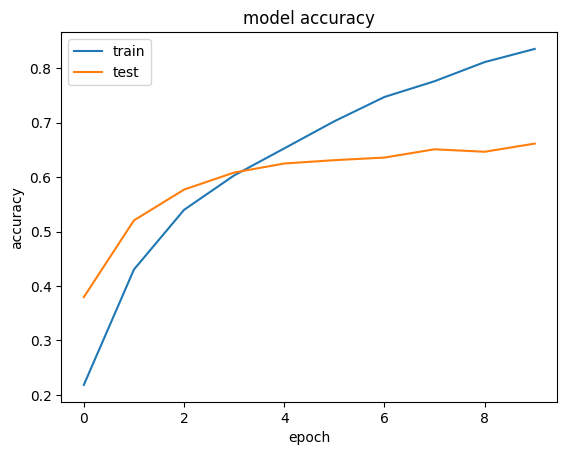

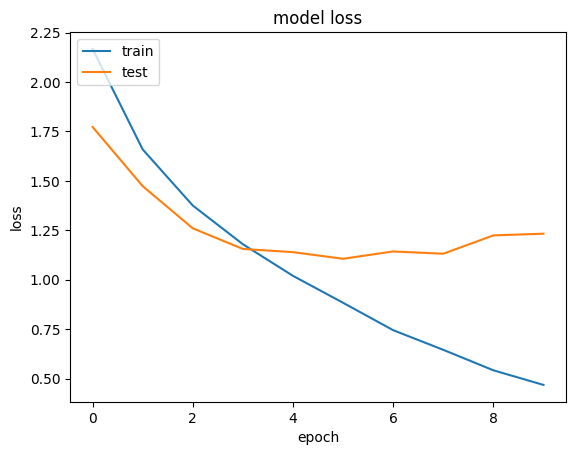

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
class_indices = val_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}

# Get the true class labels from the generator
true_classes = val_generator.classes

# Get the filenames from the generator
val_filenames = val_generator.filenames
predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Loop through filenames, predicted classes, and true classes
for filename, predicted_class, true_class in zip(val_filenames, predicted_classes, true_classes):
    filename = os.path.basename(filename)  # Get the base filename
    predicted_label = class_labels[predicted_class]
    true_label = class_labels[true_class]
    if (true_label != predicted_label):
      print(f"Filename: {filename}, Predicted Class: {predicted_label}, True Class: {true_label}")

138/138 [==============================] - 5s 32ms/step
Filename: DESTYS, Fardigo - Motivation_018.png, Predicted Class: Reggaeton, True Class: Amapiano
Filename: DJ Maphorisa, Visca - Ba Straata (feat. 2woshort, Stompiiey, ShaunMusiQ, Ftears & Madumane)_004.png, Predicted Class: Jungle, True Class: Amapiano
Filename: DJ Maphorisa, Visca - Ba Straata (feat. 2woshort, Stompiiey, ShaunMusiQ, Ftears & Madumane)_015.png, Predicted Class: Neo-Soul, True Class: Amapiano
Filename: Davido - UNAVAILABLE (feat. Musa Keys)_013.png, Predicted Class: Soca, True Class: Amapiano
Filename: Dj Jok3r, La Formula, oatsfield - La Vida Loca_017.png, Predicted Class: Reggaeton, True Class: Amapiano
Filename: Gee N - No Later_000.png, Predicted Class: Neo-Soul, True Class: Amapiano
Filename: Harry Cane, Master KG, DJ Latimmy - Dubula_000.png, Predicted Class: Funky-Soul, True Class: Amapiano
Filename: Harry Cane, Master KG, DJ Latimmy - Dubula_010.png, Predicted Class: Funky-Soul, True Class: Amapiano
Filena

In [ ]:
import numpy as np

# Sort the predicted probabilities to get the top 3 classes
top3_predictions = np.argsort(predictions, axis=1)[:, -3:][:, ::-1]  # Get the indices of the top 3 classes

# Loop through filenames, predicted classes, and true classes
for filename, top3_classes, true_class in zip(val_filenames, top3_predictions, true_classes):
    filename = os.path.basename(filename)  # Get the base filename
    true_label = class_labels[true_class]
    predicted_labels = [class_labels[class_idx] for class_idx in top3_classes]

    if true_label not in predicted_labels:
        print(f"Filename: {filename}, True Class: {true_label}, Top 3 Predicted Classes: {', '.join(predicted_labels)}")


Filename: DJ Maphorisa, Visca - Ba Straata (feat. 2woshort, Stompiiey, ShaunMusiQ, Ftears & Madumane)_015.png, True Class: Amapiano, Top 3 Predicted Classes: Neo-Soul, Bossa-Nova, Samba
Filename: Dj Jok3r, La Formula, oatsfield - La Vida Loca_017.png, True Class: Amapiano, Top 3 Predicted Classes: Reggaeton, Soca, Favela-Funk
Filename: Gee N - No Later_000.png, True Class: Amapiano, Top 3 Predicted Classes: Neo-Soul, Bossa-Nova, Samba
Filename: Harry Cane, Master KG, DJ Latimmy - Dubula_010.png, True Class: Amapiano, Top 3 Predicted Classes: Funky-Soul, Neo-Soul, Jungle
Filename: Ice Beats Slide, Sbuda Maleather, 2woBunnies - JAGERMEISTER_013.png, True Class: Amapiano, Top 3 Predicted Classes: Neo-Soul, Jungle, RnB
Filename: Kamo Mphela, BoiBizza, Chley, Nobantu Vilakazi, Bontle Smith, Visca, Shaun MusiQ, Ftears, Mellow & Sleazy - HANNAH MONTANA_015.png, True Class: Amapiano, Top 3 Predicted Classes: Funky-Soul, Reggaeton, Samba
Filename: Lojay, Sarz, Chris Brown - Monalisa_014.png, Tr

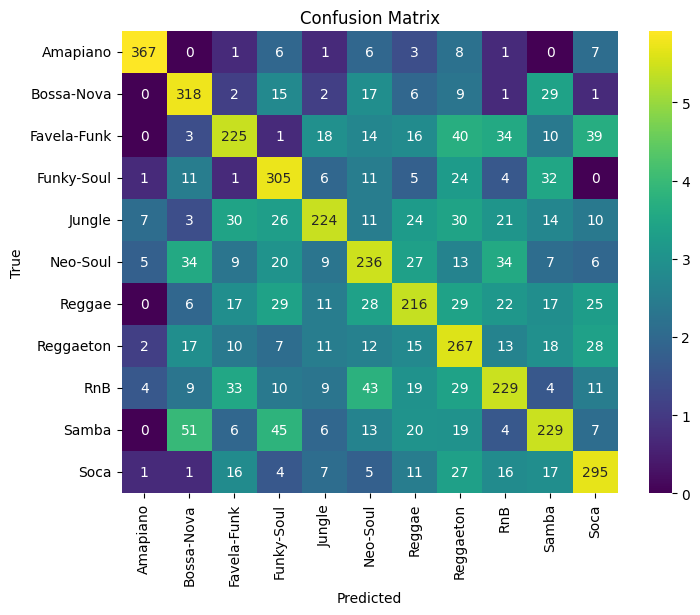


Classification Report:
              precision    recall  f1-score   support

    Amapiano       0.95      0.92      0.93       400
  Bossa-Nova       0.70      0.80      0.75       400
 Favela-Funk       0.64      0.56      0.60       400
  Funky-Soul       0.65      0.76      0.70       400
      Jungle       0.74      0.56      0.64       400
    Neo-Soul       0.60      0.59      0.59       400
      Reggae       0.60      0.54      0.57       400
   Reggaeton       0.54      0.67      0.60       400
         RnB       0.60      0.57      0.59       400
       Samba       0.61      0.57      0.59       400
        Soca       0.69      0.74      0.71       400

    accuracy                           0.66      4400
   macro avg       0.66      0.66      0.66      4400
weighted avg       0.66      0.66      0.66      4400



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=conf_matrix, fmt='d', cmap='viridis',
            xticklabels=list(class_labels.values()),
            yticklabels=list(class_labels.values()))

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Optionally, print a classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=list(class_labels.values())))
